In [66]:
# Importamos las librerías que precisamos
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.neural_network import MLPRegressor
import matplotlib.pyplot as plt

# 1)Cree un dataframe de Pandas que contenga los datos del archivo student_performance.csv suministrado 
# Carga del archivo CSV
df = pd.read_csv(r"C:\Users\celin\OneDrive\student_performance.csv")


# Mostrar las primeras 5 filas
print(df.head())


   Hours Studied  Previous Scores Extracurricular Activities  Sleep Hours  \
0              7               99                        Yes            9   
1              4               82                         No            4   
2              8               51                        Yes            7   
3              5               52                        Yes            5   
4              7               75                         No            8   

   Sample Question Papers Practiced  Performance Index  
0                                 1               91.0  
1                                 2               65.0  
2                                 2               45.0  
3                                 2               36.0  
4                                 5               66.0  


In [67]:
# Variable transformada en valor numérico
df['Extracurricular Activities'] = df['Extracurricular Activities'].map({'No': 0, 'Yes': 1})


In [68]:
print(df.isnull().sum())  # Muestra cuántos valores faltan en cada columna
print(df.describe())


Hours Studied                       0
Previous Scores                     0
Extracurricular Activities          0
Sleep Hours                         0
Sample Question Papers Practiced    0
Performance Index                   0
dtype: int64
       Hours Studied  Previous Scores  Extracurricular Activities  \
count   10000.000000     10000.000000                10000.000000   
mean        4.992900        69.445700                    0.494800   
std         2.589309        17.343152                    0.499998   
min         1.000000        40.000000                    0.000000   
25%         3.000000        54.000000                    0.000000   
50%         5.000000        69.000000                    0.000000   
75%         7.000000        85.000000                    1.000000   
max         9.000000        99.000000                    1.000000   

        Sleep Hours  Sample Question Papers Practiced  Performance Index  
count  10000.000000                      10000.000000       10

In [69]:
# Elimino performance index, porque El Performance Index no se normaliza porque es la variable dependiente (o variable objetivo) que estamos tratando de predecir en los modelos de regresión
# Elimino el Extracurricular Activities porque tienen varianza 0, Las columnas con varianza cero no aportan información a un modelo de regresión, ya que no hay diferencia en los valores que pueda ayudar a predecir el índice de rendimiento.
# Definir X e y
X = df.drop(['Performance Index', 'Extracurricular Activities'], axis=1)  # Eliminar columna sin varianza
y = df['Performance Index']

# 2)Normalice los datos correspondientes a cada variable de entrada, restando la media y dividiendo entre la desviación estándar
scaler = StandardScaler()
X_normalized = scaler.fit_transform(X)

# 3) Utilice el comando train_test_split para separar los datos en conjuntos de entrenamiento y prueba. La fracción de datos de prueba debe estar entre 20% y 30%. 

X_train, X_test, y_train, y_test = train_test_split(X_normalized, y, test_size=0.25, random_state=42)

# Mostrar las primeras filas para verificar
print(X_train[:5])

[[ 0.00274218 -1.17895075 -0.90259446  0.1453332 ]
 [ 0.77518771  1.06988784 -1.49229423  1.54042034]
 [-0.76970335  1.41586301  0.27680507 -1.24975394]
 [ 1.54763324 -0.89063811 -0.90259446  1.54042034]
 [-0.38348058 -0.77531305  0.86650484  0.49410499]]


In [70]:
# 4. Modelo de regresión lineal múltiple
linear_model = LinearRegression()
linear_model.fit(X_train, y_train)

# Hacer predicciones
y_pred_linear = linear_model.predict(X_test)


In [71]:
# 5. Modelo de regresión basado en red neuronal densa
neural_model = MLPRegressor(hidden_layer_sizes=(10, 10), max_iter=1000, random_state=42)
neural_model.fit(X_train, y_train)

# Hacer predicciones
y_pred_neural = neural_model.predict(X_test)

In [72]:
# 6. Evaluación del desempeño de ambos modelos
def evaluate_model(y_true, y_pred):
    mae = mean_absolute_error(y_true, y_pred)
    mse = mean_squared_error(y_true, y_pred)
    r2 = r2_score(y_true, y_pred)
    return round(mae, 2), round(mse, 2), round(r2, 2)

# Modelo lineal
mae_linear, mse_linear, r2_linear = evaluate_model(y_test, y_pred_linear)

# Modelo de red neuronal
mae_neural, mse_neural, r2_neural = evaluate_model(y_test, y_pred_neural)

In [73]:
# Resultados
print("\nModelo de Regresión Lineal:")
print(f"Error Absoluto Medio (MAE): {mae_linear}")
print(f"Error Cuadrático Medio (MSE): {mse_linear}")
print(f"Puntuación R2: {r2_linear}")

print("\nModelo de Red Neuronal:")
print(f"Error Absoluto Medio (MAE): {mae_neural}")
print(f"Error Cuadrático Medio (MSE): {mse_neural}")
print(f"Puntuación R2: {r2_neural}")



Modelo de Regresión Lineal:
Error Absoluto Medio (MAE): 1.62
Error Cuadrático Medio (MSE): 4.15
Puntuación R2: 0.99

Modelo de Red Neuronal:
Error Absoluto Medio (MAE): 1.63
Error Cuadrático Medio (MSE): 4.19
Puntuación R2: 0.99


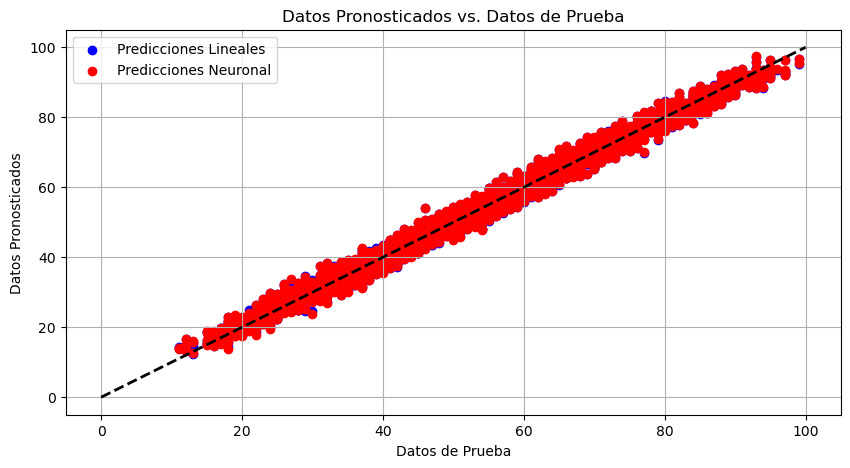

In [74]:
# Gráfico de dispersión
plt.figure(figsize=(10, 5))
plt.scatter(y_test, y_pred_linear, color='blue', label='Predicciones Lineales')
plt.scatter(y_test, y_pred_neural, color='red', label='Predicciones Neuronal')
plt.plot([0, 100], [0, 100], 'k--', lw=2)
plt.xlabel('Datos de Prueba')
plt.ylabel('Datos Pronosticados')
plt.title('Datos Pronosticados vs. Datos de Prueba')
plt.legend()
plt.grid()
plt.show()

In [75]:
# Comparación de ambos resultados
if r2_linear >= 0.95 and r2_neural >= 0.95:
    print("\nAmbos modelos alcanzaron un R2 superior al 95%.")
else:
    print("\nUno o ambos modelos no alcanzaron un R2 del 95%.")


Ambos modelos alcanzaron un R2 superior al 95%.


El alto porcentaje de ambos modelos, significa que el 99% de la variabilidad en el índice de rendimiento de los estudiantes se puede explicar por las variables de entrada.
Los modelos son muy eficaces para predecir el rendimiento de los estudiantes basado en las horas de estudio, calificaciones previas, actividades extracurriculares, horas de sueño y el número de exámenes practicados.Esto implica que las variables utilizadas son relevantes (hemos eliminado las Actividades extracurriculares).
Por lo tanto, son modelos confiables para hacer predicciones precisas utilizando nuevos datos.